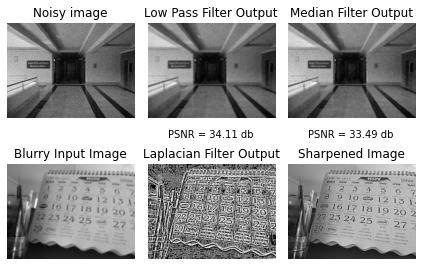

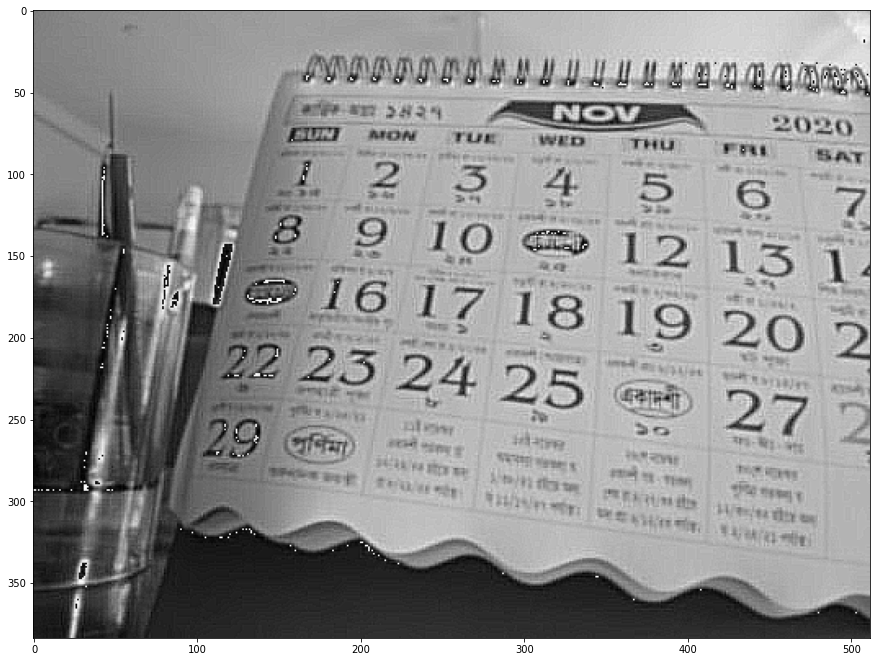

In [3]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 16 14:04:39 2020

"""

import matplotlib.pyplot as plt
import matplotlib.image as mpltimg 
import numpy as np
import math

#_______ 3 user defined functions which you have to code their functionality_________

def convolution2D(img, kernel, padding_type):
    # write your code here
    if kernel.shape[0]%2==0 or kernel.shape[0]!=kernel.shape[1]:
        print('kernel size can only be odd')
        return
    row=img.shape[0]
    col=img.shape[1]
    kernel_size=kernel.shape[0]
    inc=kernel_size//2

    # padding_type can take values 0, 1 or 2
        # 0 - zero padding
        # 1 - duplicate boundary pixels for padding
        # 2 - padding is done by mirroring the pixels
    # should handle kernel of any size but odd values only eg. 5x5, 7x7
    # image is a grayscale image
    imgPadded=np.zeros((row+(inc*2),col+(inc*2)),dtype=np.uint8)
    imgPadded[inc:imgPadded.shape[0]-inc,inc:imgPadded.shape[1]-inc]=img
    if padding_type==1:
        for i in range(inc,0,-1):
            imgPadded[i-1,:]+=imgPadded[i,:]
            imgPadded[imgPadded.shape[0]-i,:]+=imgPadded[imgPadded.shape[0]-i-1,:]
        for i in range(inc,0,-1):
            imgPadded[:,i-1]+=imgPadded[:,i]
            imgPadded[:,imgPadded.shape[1]-i]+=imgPadded[:,imgPadded.shape[1]-i-1]

    elif padding_type==2:
        for i in range(1,inc+1):
            imgPadded[inc-i,:]+=imgPadded[inc+i,:]
            imgPadded[img.shape[0]+inc+i-1,:]+=imgPadded[img.shape[0]+inc-i-1,:]
        for i in range(1,inc+1):
            imgPadded[:,inc-i]+=imgPadded[:,inc+i]
            imgPadded[:,img.shape[1]+inc+i-1]+=imgPadded[:,img.shape[1]+inc-i-1]
    #convolution operation
    filt_image=np.zeros((row,col),dtype=np.uint8)
    for i in range(0,row):
        for j in range(0,col):
            filt_image[i,j]=np.sum(imgPadded[i:i+kernel_size,j:j+kernel_size]*kernel)

    # dummy assignment (to be removed) 
    return filt_image
    

def medianFiltering(img, kernel_size, padding_type):
    # write your code here
    if kernel_size%2==0:
        print('kernel size can only be odd')
        return
    row=img.shape[0]
    col=img.shape[1]
    inc=kernel_size//2
    # padding_type can take values 0, 1 or 2
        # 0 - zero padding
        # 1 - duplicate boundary pixels for padding
        # 2 - padding is done by mirroring the pixels
    # should handle kernel of any size but odd values only eg. 5x5, 7x7
    # image is a grayscale image
    imgPadded=np.zeros((row+(inc*2),col+(inc*2)),dtype=np.uint8)
    imgPadded[inc:imgPadded.shape[0]-inc,inc:imgPadded.shape[1]-inc]=img
    if padding_type==1:
        for i in range(inc,0,-1):
            imgPadded[i-1,:]+=imgPadded[i,:]
            imgPadded[imgPadded.shape[0]-i,:]+=imgPadded[imgPadded.shape[0]-i-1,:]
        for i in range(inc,0,-1):
            imgPadded[:,i-1]+=imgPadded[:,i]
            imgPadded[:,imgPadded.shape[1]-i]+=imgPadded[:,imgPadded.shape[1]-i-1]
    elif padding_type==2:
        for i in range(1,inc+1):
            imgPadded[inc-i,:]+=imgPadded[inc+i,:]
            imgPadded[img.shape[0]+inc+i-1,:]+=imgPadded[img.shape[0]+inc-i-1,:]
        for i in range(1,inc+1):
            imgPadded[:,inc-i]+=imgPadded[:,inc+i]
            imgPadded[:,img.shape[1]+inc+i-1]+=imgPadded[:,img.shape[1]+inc-i-1]
    #median filtering
    mid_pos=(kernel_size**2)//2
    med_image=np.zeros((row,col),dtype=np.uint8)
    for i in range(0,row):
        for j in range(0,col):
            med_image[i,j]=np.sort(imgPadded[i:i+kernel_size,j:j+kernel_size],None)[mid_pos]
    
    return med_image


# You can club the above two functions/write any other functions additionally if you wish

def computePSNR(image1, image2):
    if image1.shape!=image2.shape:
        print("images are not of same size")
    mse=(np.sum((image1-image2)**2))/(image1.shape[0]*image1.shape[1])
    a=255**2
    psnr=10*math.log10(a/mse)
    return psnr


# _____________________main program begins here___________________

def main():
    # reading a noisy image
    noisy_image = mpltimg.imread('images/noisy_image.jpg')


    original_image = mpltimg.imread('images/original.jpg')


# _____________________________________________________________________
# Average filter kernel
    kernel = 1/9 * np.array([[ 1, 1, 1],
                          [ 1, 1, 1],
                          [ 1, 1, 1]]) 


    low_pass_filtered_image = convolution2D(noisy_image, kernel, 1);


    avg_psnr = computePSNR(original_image,low_pass_filtered_image)


    med_filtered_image = medianFiltering(noisy_image, 3, 1);
    
    med_psnr = computePSNR(original_image,med_filtered_image)
    
    
# _____________________________________________________________________
# reading a blurry image
    blurry_image = mpltimg.imread('images/blurry_image.jpg')
    
    
    # Laplacian filter kernel
    kernel =        np.array([[ 1, 1, 1],
                              [ 1, -8, 1],
                              [ 1, 1, 1]]) 


    
    laplacian_filtered_image = convolution2D(blurry_image, kernel, 1);
    
# perform the addition as in Eqn. 3.6.7 to obtain the sharpened image
    
    
    sharpened_image =blurry_image-laplacian_filtered_image  # dummy assignment (to be removed) 
    
    
    
# _____________________________________________________________________
# Code to display the images
    
    fig, axes = plt.subplots(nrows=2, ncols=3)
    
    ax = axes.ravel()
    
    ax[0].imshow(noisy_image, cmap='gray')
    ax[0].set_title("Noisy image")
    ax[0].set_axis_off()
    
    ax[1].imshow(low_pass_filtered_image, cmap='gray')
    ax[1].set_title("Low Pass Filter Output")
    ax[1].set_axis_off()
    ax[1].text(x=40, y=230, s="PSNR = %1.2f db" %avg_psnr)
    
    ax[2].imshow(med_filtered_image, cmap='gray')
    ax[2].set_title("Median Filter Output")
    ax[2].set_axis_off()
    ax[2].text(x=40, y=230, s="PSNR = %1.2f db" %med_psnr)
    
    
    ax[3].imshow(blurry_image, cmap='gray')
    ax[3].set_title("Blurry Input Image")
    ax[3].set_axis_off()
    
    
    ax[4].imshow(laplacian_filtered_image, cmap='gray')
    ax[4].set_title("Laplacian Filter Output")
    ax[4].set_axis_off()
    
    
    ax[5].imshow(sharpened_image, cmap='gray')
    ax[5].set_title("Sharpened Image")
    ax[5].set_axis_off()
    
    
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15,15))
    plt.imshow(sharpened_image,cmap='gray')
    plt.show()
if __name__=="__main__":
    main()

